# 훈련 데이터와 테스트 데이터
## 정확도가 정말 1.0 인가?

In [12]:
from sklearn.datasets import load_iris
import numpy as np
iris = load_iris()
X = iris.data
y = iris.target

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [61]:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [62]:
y_pred = knn.predict(X)

In [63]:
np.mean(y == y_pred)

1.0

## 훈련 데이터와 테스트 데이터의 분리
- 머신러닝 모델을 만들 때 사용한 데이터는 모델의 성능측정용으로 사용하지 않음  => 일반화 문제
- 훈련 데이터: 머신러닝 모델을 만들 목적으로 사용
- 테스트 데이터: 머신러닝 모델이 잘 작동하는지를 측정할 목적으로 사용
- scikit-learn의 train_test_split 함수를 주로 사용 (기본적으로 훈련용 75%, 테스트용 25% 구성)


In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 25)

In [65]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape   # 훈련용 데이터와 테스트 데이터로 분류 완료

((120, 4), (120,), (30, 4), (30,))

### knn분류기에 훈련용 데이터를 적합

In [71]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### 훈련용 데이터로 학습된 knn분류기에 테스트 값을 넣어 예측값을 구한다

In [67]:
y_pred = knn.predict(X_test)
y_pred

array([0, 2, 2, 1, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2, 1, 1, 1, 1,
       1, 0, 0, 2, 1, 2, 2, 0])

### 실제 y_test값과 y_pred가 얼마나 일치하는지 계산하여 정확도를 구한다

In [68]:
np.mean(y_test == y_pred)

0.9

In [69]:
knn.score(X_test, y_test)    # np.mean으로 정확도를 구할수도 있지만 score(X_test, y_test)를 이용해서도 구할 수 있다

0.9

In [70]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)     # metrics모듈의 accuracy_score(실제값, 예측값)는 분류 문제의 score를 계산해준다. 

0.9

## 하이퍼파라미터 선택

In [82]:
train_accuracy = []
test_accuracy = []
neighbors = range(1, 11)
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors= n)
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

## n값에 따른 정확도 변화 시각화

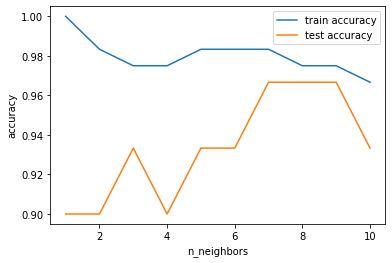

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(neighbors, train_accuracy, label = 'train accuracy')
plt.plot(neighbors, test_accuracy, label = 'test accuracy')
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.legend()

## 위 그림에서 확인할 수 있는 사실은 knn알고리즘에서의 최적의 파라미터를 찾는 방법은 반복에 의한 확인 방법밖에 없다는 것